In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
enaho = pd.read_stata("data/data_enaho.dta")
enaho

C:\Users\Roberto Carlos\anaconda3\lib\site-packages\pandas\io\stata.py:1409: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  warnings.warn(msg, UnicodeWarning)


,year,conglome,vivienda,hogar,ubigeo,codperso,dominio,estrato,panel,p203,...,acumulado,estud,educa,d_edu,exper,exper_2,tenure_2,edad_2,jefe,ubigeo_2
0,2019,005086,037,11,010205,02,selva,Área de empadronamiento rural - aer compuesto,2.017005e+16,hijo/hija,...,6.0,5.0,11.0,Secundaria completa,7.0,49.0,36.0,576.0,familiar,010000
1,2019,005118,014,11,010705,03,selva,menos de 401 viviendas,2.019005e+16,hijo/hija,...,6.0,5.0,11.0,Secundaria completa,1.0,1.0,NaN,324.0,familiar,010000
2,2019,005038,062,11,010701,02,selva,"de 4,001 a 10,000 viviendas",2.018005e+16,esposo/esposa,...,11.0,6.0,17.0,Universitaria completa,10.0,100.0,NaN,1089.0,familiar,010000
3,2019,005065,013,11,010109,03,sierra norte,"401 a 4,000 viviendas",2.019005e+16,hijo/hija,...,6.0,5.0,11.0,Secundaria completa,6.0,36.0,25.0,529.0,familiar,010000
4,2019,005118,031,11,010705,03,selva,menos de 401 viviendas,2.019005e+16,hijo/hija,...,11.0,3.0,14.0,No universitaria completa,1.0,1.0,NaN,441.0,familiar,010000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18040,2019,009703,084,11,250302,05,selva,"401 a 4,000 viviendas",2.019010e+16,yerno/nuera,...,11.0,4.0,15.0,Universitaria incompleta,0.0,0.0,NaN,441.0,familiar,250000
18041,2019,009675,124,11,250107,03,selva,"de 20,001 a 100,000 viviendas",2.019010e+16,hijo/hija,...,6.0,5.0,11.0,Secundaria completa,5.0,25.0,0.0,484.0,familiar,250000
18042,2019,009703,084,11,250302,04,selva,"401 a 4,000 viviendas",2.019010e+16,hijo/hija,...,6.0,5.0,11.0,Secundaria completa,9.0,81.0,0.0,676.0,familiar,250000
18043,2019,009700,143,11,250301,03,selva,"401 a 4,000 viviendas",2.019010e+16,hijo/hija,...,6.0,5.0,11.0,Secundaria completa,3.0,9.0,NaN,400.0,familiar,250000


In [9]:
base = enaho.groupby([ 'empresa' ]).count()
base

,year,conglome,vivienda,hogar,ubigeo,codperso,dominio,estrato,panel,p203,...,acumulado,estud,educa,d_edu,exper,exper_2,tenure_2,edad_2,jefe,ubigeo_2
empresa,,,,,,,,,,,,,,,,,,,,,
microempresa,6798,6798,6798,6798,6798,6798,6798,6798,6798,6798,...,6795,6798,6795,6795,6748,6748,6798,6798,6798,6798
pequeña empresa,1026,1026,1026,1026,1026,1026,1026,1026,1026,1026,...,1025,1026,1025,1025,1014,1014,1025,1026,1026,1026
mediana empresa,1145,1145,1145,1145,1145,1145,1145,1145,1145,1145,...,1145,1145,1145,1145,1138,1138,1145,1145,1145,1145
gran empresa,3227,3227,3227,3227,3227,3227,3227,3227,3227,3227,...,3227,3227,3227,3227,3218,3218,3227,3227,3227,3227


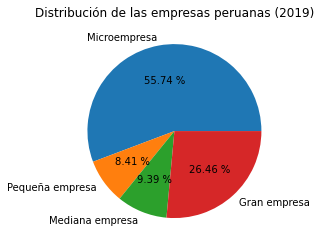

In [16]:
labels=['Microempresa','Pequeña empresa' , 'Mediana empresa', 'Gran empresa']
plt.pie(base['conglome'], labels=labels, autopct='%.2f %%')
plt.title('Distribución de las empresas peruanas (2019)')
plt.show()

In [17]:
base2 = enaho.groupby([ 'sector' ]).count()
base2

,year,conglome,vivienda,hogar,ubigeo,codperso,dominio,estrato,panel,p203,...,acumulado,estud,educa,d_edu,exper,exper_2,tenure_2,edad_2,jefe,ubigeo_2
sector,,,,,,,,,,,,,,,,,,,,,
"agricultura, selvicultura y pesca",1428,1428,1428,1428,1428,1428,1428,1428,1428,1428,...,1428,1428,1428,1428,1423,1423,1428,1428,1428,1428
minería,56,56,56,56,56,56,56,56,56,56,...,56,56,56,56,56,56,56,56,56,56
Manufactura y servicios públcios,1384,1384,1384,1384,1384,1384,1384,1384,1384,1384,...,1384,1384,1384,1384,1380,1380,1383,1384,1384,1384
Construcción,39,39,39,39,39,39,39,39,39,39,...,39,39,39,39,39,39,39,39,39,39
"Comercio, hoteles y restaurantes",1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,...,1923,1925,1923,1923,1914,1914,1925,1925,1925,1925
"Transporte, comunicaciones y alamacenamiento",3575,3575,3575,3575,3575,3575,3575,3575,3575,3575,...,3573,3575,3573,3573,3550,3550,3575,3575,3575,3575
"Finanzas, seguro y bienes raíces",381,381,381,381,381,381,381,381,381,381,...,381,381,381,381,379,379,381,381,381,381
"Servicios persnales, sociales y comunales",3660,3660,3660,3660,3660,3660,3660,3660,3660,3660,...,3660,3660,3660,3660,3629,3629,3660,3660,3660,3660


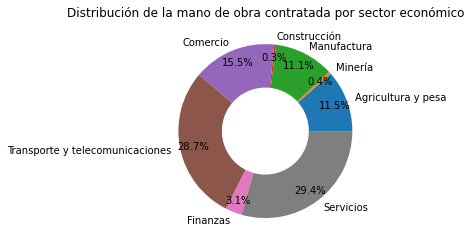

In [27]:
labels=['Agricultura y pesa','Minería','Manufactura','Construcción','Comercio','Transporte y telecomunicaciones', 'Finanzas', 'Servicios']

plt.pie(base2['conglome'], labels=labels,
        autopct='%1.1f%%', pctdistance=0.85)
  
center_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()

fig.gca().add_artist(center_circle)
  
plt.title('Distribución de la mano de obra contratada por sector económico')
  
plt.show()